<h2><center>Методы уменьшения размерности</center></h2>

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [6]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, IntSlider, FloatSlider

# Методы понижения размерности признаков

## Для чего можно понижать размерность признаков?

* Cмотреть на 2-3 признака удобнее чем на 100
* Потенциально может улучшить качество моделей
* Удаление лишних коррелирующих признаков
* Ускоряет обучение
* Данные занимают меньше места
* Меньше признаков - легче интерпретировать модели

## Способы понижения размерности

Избавляться от размерности можно методами **отбора признаков (Feature Selection)** и методами **уменьшения размерности (Feature Reduction)**

**Глобальная разница**
* Feature Selection: не используем часть признаков
* Feature Reduction: исходные признаки проходят через некоторое преобразование $f(\cdot)$, и на выходе признаков становится меньше

# Principal Component Analysis
## Метод Главных Компонент

## Интерпретация

* Интерпретация 1: находит такие ортогональные оси, вдоль которых дисперсия данных максимальна

<center><img src='http://www.visiondummy.com/wp-content/uploads/2014/05/correlated_2d.png' width=400></center>

<center><img src='img/pca.png' width=800></center>

## Интерпретация

* Интерпретация 2: Найти такое подпространство меньшей размерности $L$ Такое что различие между точками и их проекциями минимальна

<center><img src='img/plane_best_fit.png' width=800></center>

<center><img src='img/pca_example.png' width=800></center>

## В двух словах:

* Совершаем переход к новым осям, так что:
    * Новые переменные являются линейной комбинацией старых переменных
    * Новые оси ортогональны друг другу
    * Дисперсия вдоль новых осей максимальная

In [4]:
from sklearn.datasets import load_iris
import seaborn as sns

In [5]:
iris = sns.load_dataset('iris')

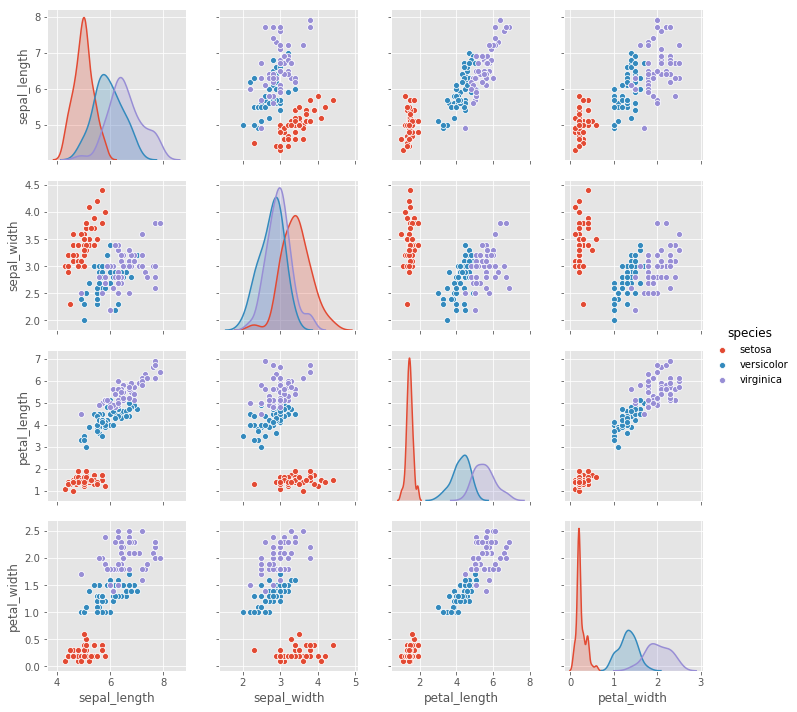

In [6]:
sns.pairplot(iris, hue='species')

In [7]:
X = iris.iloc[:, :4].values

mapping = dict((s, i) for i, s in enumerate(iris.species.unique()))
y = iris.species.replace(mapping).values

In [8]:
from sklearn.decomposition import PCA

In [9]:
# Перейдем от 4 признаков к 2 компонентам
pca = PCA(n_components=2, random_state=123)
pca.fit(X) # Никакого "y"

PCA(copy=True, iterated_power='auto', n_components=2, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
PC = pca.transform(X)

In [11]:
X.shape

(150, 4)

In [12]:
PC.shape

(150, 2)

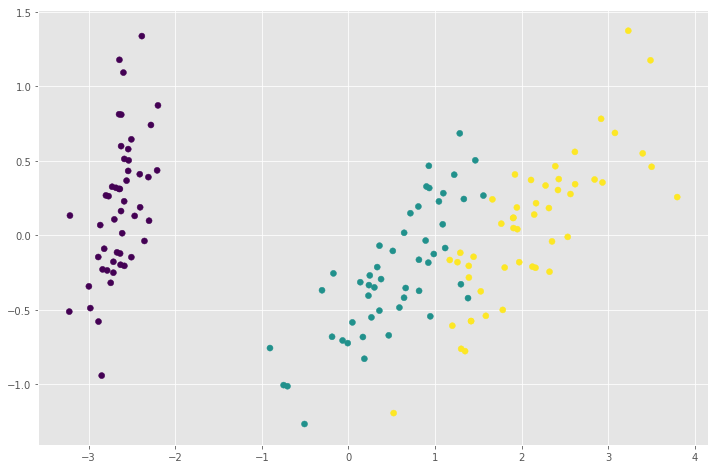

In [13]:
plt.scatter(PC[:,0], PC[:,1],c=y)

In [14]:
PC[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

Как, чисто математически, мы спроецировали 4 признака в 2?

## Что значит "перейти к новым координатам"?

* Пусть у нас есть объект $x$ с тремя признаками: $x=(-0.343, -0.754, 0.241)$
* Можно сказать, что он представлен в пространстве, натянутом на 3 стандартных базистых вектора:
$$ e_1 = \left( \begin{array}{c}
1 \\
0 \\
0
\end{array} \right) \quad
e_2 = \left( \begin{array}{c}
0 \\
1 \\
0
\end{array} \right) \quad
e_3 = \left( \begin{array}{c}
0 \\
0 \\
1
\end{array} \right) \quad$$

$$ x = -0.343 e_1 + -0.754 e_2 + 0.241 e_3 $$

* Предположими мы хотим перейти к другому базису, например:

$$ w_1 = \left( \begin{array}{c}
-0.390 \\
0.089 \\
-0.916
\end{array} \right) \quad
w_2 = \left( \begin{array}{c}
-0.639 \\
-0.742 \\
0.200
\end{array} \right) \quad
w_3 = \left( \begin{array}{c}
-0.663 \\
0.664 \\
0.346
\end{array} \right) \quad$$
* Как спроицировать наш объект $x$ из исходного базиса в данный?


## Проецируем

$$ w_1 = \left( \begin{array}{c}
-0.390 \\
0.089 \\
-0.916
\end{array} \right) \quad
w_2 = \left( \begin{array}{c}
-0.639 \\
-0.742 \\
0.200
\end{array} \right) \quad
w_3 = \left( \begin{array}{c}
-0.663 \\
0.664 \\
0.346
\end{array} \right) \quad$$


$$ z = W^\top x = \left( \begin{array}{ccc}
-0.390 & 0.089 & -0.916\\
-0.639 & -0.742 & 0.200 \\
-0.663 & 0.664 & 0.346
\end{array} \right)
\left( \begin{array}{c}
-0.343 \\
-0.754 \\
0.241
\end{array} \right) = 
\left( \begin{array}{c}
-1.154 \\
0.828 \\
0.190
\end{array} \right)$$

То есть: $$ x = -1.154 w_1 + 0.828 w_2 + 0.190 w_3$$

(Пример взят из [Mohammed J. Zaki, Ch7](https://www.amazon.com/Data-Mining-Analysis-Fundamental-Algorithms/dp/0521766338) )

В нашем случае, та самая матрица лежит в `pca.components_`

In [15]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [16]:
PC[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

In [17]:
# Но что-то не так!
PC_raw = X.dot(pca.components_.T)

In [18]:
PC_raw[:10]

array([[2.81823951, 5.64634982],
       [2.78822345, 5.14995135],
       [2.61337456, 5.18200315],
       [2.75702228, 5.0086536 ],
       [2.7736486 , 5.65370709],
       [3.2215055 , 6.06828303],
       [2.68182738, 5.23749119],
       [2.87622016, 5.49033754],
       [2.6159824 , 4.74864082],
       [2.82960933, 5.21317833]])

In [19]:
PC[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

Дело в том, что первый шак алгоритма МГК - центрирование признаков

In [20]:
X_ = X-X.mean(axis=0)

In [21]:
PC_raw = X_.dot(pca.components_.T)
PC_raw[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

In [22]:
PC[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

## Сколько компонент брать?

* PCA может посчитать долю объясненной дисперсии каждой компоненты
<center><img src='img/cumul_rat.png' width=900></center>

* Можно рассматривать количество компонент как гиперпараметр, который влияет на качество конечной задачи

In [23]:
# Обычно, если объясненная дисперсия концентрируется в одной компоненте - это говорит о 
# различных шкалах признаков
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [24]:
pca.explained_variance_

array([4.22824171, 0.24267075])

Рекомендуется так же шкалировать признаки


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

In [38]:
pca_pipeline.fit(X)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [39]:
pca = pca_pipeline.named_steps['pca']

In [40]:
pca.explained_variance_

array([2.04128743, 1.79298114])

In [41]:
pca.explained_variance_ratio_

array([0.29155417, 0.25608894])

In [42]:
PC = pca_pipeline.transform(X)

In [43]:
PC[:10]

array([[ 2.08727038, -1.60553339],
       [-0.14928362, -0.6946203 ],
       [ 0.23618859, -0.94443976],
       [ 1.42134415,  0.20725047],
       [ 0.87284122, -1.73681872],
       [ 0.44724128, -1.59776184],
       [-0.96371807,  0.10623219],
       [-1.21789447, -1.13788893],
       [ 1.02256281, -0.88330715],
       [ 2.70526475,  2.89900016]])

## Небольшое дополнение для разреженных данных

Как мы уже с вами обсудили, первый шаг МГК - центрирование данных

Но что будет, если `X` - разреженная матрица (почти вся состоит из 0)?

На помощь приходит метод, который в sklearn называется TruncatedSVD, а в других местах еще называется **Latent Semantic Analysis - LSA** (использовался в анализе текстовых данных)

Единственное отличие от привычного PCA - нет центрирования

In [44]:
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer

In [45]:
X = iris.iloc[:, :4].values

mapping = dict((s, i) for i, s in enumerate(iris.species.unique()))
y = iris.species.replace(mapping).values

In [46]:
emb = RandomTreesEmbedding(max_depth=6)

In [47]:
emb.fit(X)

RandomTreesEmbedding(max_depth=6, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           random_state=None, sparse_output=True, verbose=0,
           warm_start=False)

In [48]:
X_emb = emb.transform(X)

In [49]:
X_appl = emb.apply(X)

In [50]:
X_emb

<150x323 sparse matrix of type '<class 'numpy.float64'>'
	with 1500 stored elements in Compressed Sparse Row format>

In [51]:
pipeline = Pipeline([
    ('embedding', RandomTreesEmbedding(n_estimators=20, 
                                       max_depth=4)),
    ('lsa', TruncatedSVD(n_components=2, 
                         algorithm='arpack', 
                         random_state=123))
])

In [52]:
pipeline.fit(X)

Pipeline(memory=None,
     steps=[('embedding', RandomTreesEmbedding(max_depth=4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           random_state=None, sparse_output=True, verbose=0,
           warm_start=False)), ('lsa', TruncatedSVD(algorithm='arpack', n_components=2, n_iter=5, random_state=123,
       tol=0.0))])

In [53]:
X_lsa = pipeline.transform(X)

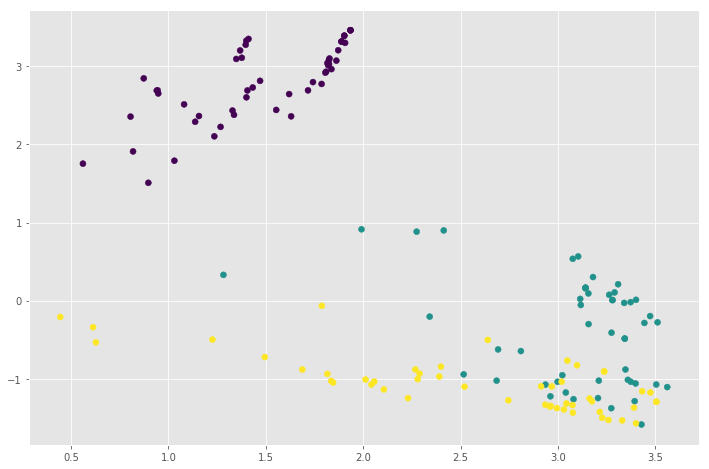

In [54]:
plt.scatter(X_lsa[:,0], X_lsa[:,1],c=y)

# Многомерное шкалирование

## Идея

* Перейти в пространство меньшей размерности так, чтобы расстояния между объектами в новом пространстве были подобны расстояниям в исходном пространстве.
* Дано $X = [x_1,\dots, x_n]\in \mathbb{R}^{N \times D}$ и/или $\delta_{ij}$ - мера близости между $(x_i,x_j)$
* Надо найти $Y = [y_1,\dots,y_n] \in \mathbb{R}^{N \times d}$ такие, что $\delta_{ij} \approx d(y_i, y_j) = \|y_i-y_j\|^2$

<center><img src='img/mds.png' width =1200></center>

Понятно, что точно воспроизвести расстояния получится не всегда

<center><img src='img/sphere_example.png'></center>

### Подходы
* Классический (cMDS)
* Метрический (metric MDS)
* Неметрический (non-metric MDS)

# t-SNE
## t-distributed stochastic neighbor embedding

* t-SNE - практически многомерное шкалирование
* Вместо этого мы будем пытаться перенести "окрестность" точек из исходного пространства в пространоство меньшей размерности
* Полученные расстояния скорее всего не будут соотносится с исходными

* Схожесть между объектами в исходном пространстве $\mathbb{R}^m$
$$
p(i, j) = \frac{p(i | j) + p(j | i)}{2n}, \quad p(j | i) = \frac{\exp(-\|\mathbf{x}_j-\mathbf{x}_i\|^2/{2 \sigma_i^2})}{\sum_{k \neq i}\exp(-\|\mathbf{x}_k-\mathbf{x}_i\|^2/{2 \sigma_i^2})}
$$
$\sigma_i$ неявно задается пользователем
* Схожесть между объектами в целевом пространстве $\mathbb{R}^k, k << m$
$$
q(i, j) = \frac{g(|\mathbf{y}_i - \mathbf{y}_j|)}{\sum_{k \neq l} g(|\mathbf{y}_i - \mathbf{y}_j|)}
$$ 
где $g(z) = \frac{1}{1 + z^2}$ - распределение Коши (t-распределение Стьюдента с 1 степенью свободы)
* Критерий
$$
J_{t-SNE}(y) = KL(P \| Q) = \sum_i \sum_j p(i, j) \log \frac{p(i, j)}{q(i, j)} \rightarrow \min\limits_{\mathbf{y}}
$$

Дивергенция Кульбака-Лейблера

## Оптимизация

* Оптимизируем $J_{t-SNE}(y)$ с помощью градиентного спуска

* [Статья](http://jmlr.csail.mit.edu/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)
* [Примеры](http://lvdmaaten.github.io/tsne/)
* [Демо и советы](http://distill.pub/2016/misread-tsne/)
    * t-SNE может быть нестабильным
    * Размеры полученных сгустков могут ничего не значить
    * Расстояния между кластерами могут ничего не значить
    * Полностью шумовые данные могут выдать структуру

## Попробуем на игрушечных данных

Сожмем признаковое пространство данных с цифрами с помощью tsne.

In [67]:
from sklearn.datasets import load_digits

In [68]:
data = load_digits()

In [69]:
labels = data['target']

In [70]:
imgs = data['images']

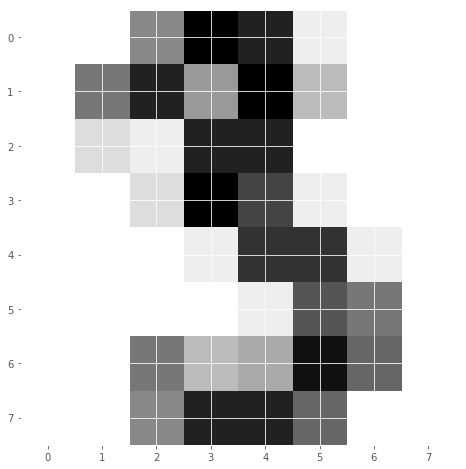

In [71]:
plt.imshow(imgs[3], cmap=plt.cm.gray_r)

In [72]:
X = data['data']

In [73]:
X.shape

(1797, 64)

In [74]:
from sklearn.manifold import TSNE

In [75]:
tsne = TSNE(perplexity=300,)

In [76]:
tsne.fit(X)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=300, random_state=None, verbose=0)

In [77]:
Z = tsne.embedding_

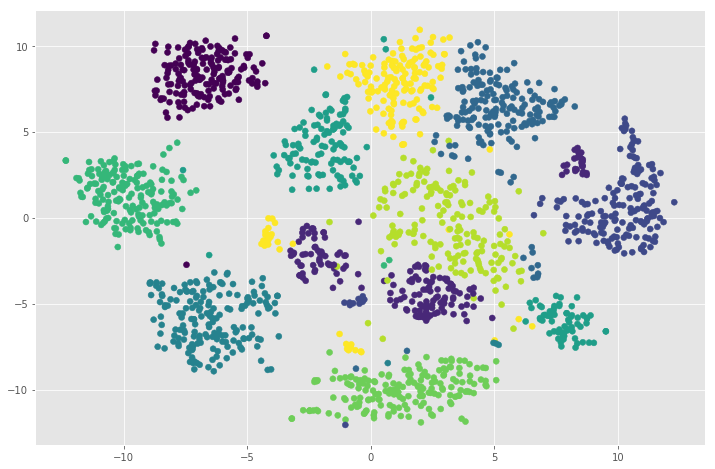

In [78]:
plt.scatter(Z[:, 0], Z[:, 1], c=labels)

In [82]:
from sklearn.manifold import TSNE

In [83]:
df = pd.read_excel('./data/Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)

In [84]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [85]:
drop_cols = ['ID', 'ZIP Code', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
clear_cols = np.setdiff1d(df.columns.values, drop_cols)

In [86]:
X = df.loc[:, clear_cols].values

In [87]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2, perplexity=50))
])

In [88]:
pipeline.fit(X)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('tsne', TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=50,
   random_state=None, verbose=0))])

In [89]:
T = pipeline.transform(X) # не получится =(

AttributeError: 'TSNE' object has no attribute 'transform'

In [7]:
import umap
from sklearn.datasets import load_digits

digits = load_digits()

embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(digits.data)

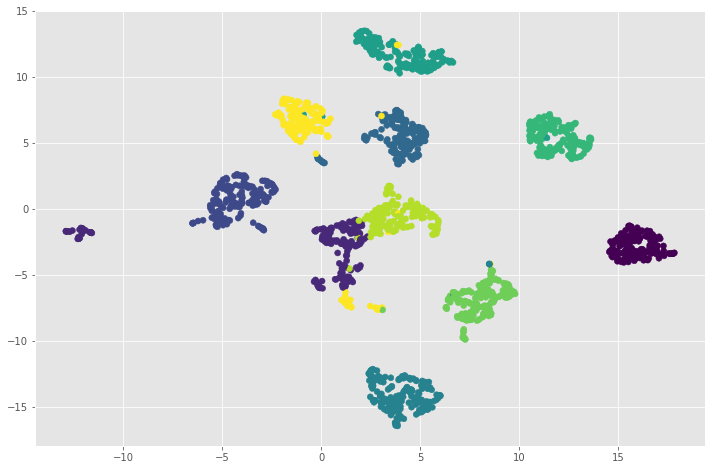

In [9]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target)

In [ ]:
# https://projects.interacta.io/country-tsne/

In [1]:
# https://nbviewer.jupyter.org/github/DmitrySerg/top-russian-music/blob/master/models/clean_visualization.ipynb